### Q. Create a logistic Decision Tree on the basis of 'Age', 'Sight', 'Astigmatic', 'Use', and 'Class' of the given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('OTPH.xls')

In [3]:
df

,Age,Sight,Astigmatic,Use,Class
0,Young,Myopic,No,Frequent,Nothing
1,Young,Myopic,No,Less,Glass
2,Young,Myopic,Yes,Frequent,Nothing
3,Young,Myopic,Yes,Less,Lens
4,Young,Hypermetropia,No,Frequent,Nothing
5,Young,Hypermetropia,No,Less,Glass
6,Young,Hypermetropia,Yes,Frequent,Nothing
7,Young,Hypermetropia,Yes,Less,Lens
8,Middle-aged,Myopic,No,Frequent,Nothing
9,Middle-aged,Myopic,No,Less,Glass


In [4]:
df.columns

Index(['Age', 'Sight', 'Astigmatic', 'Use', 'Class'], dtype='object')

In [5]:
df['Age'].value_counts()

Young          8
Middle-aged    8
Old            8
Name: Age, dtype: int64

In [6]:
df.Age.replace({'Young':1,'Middle-aged':2,'Old':3},inplace = True)

In [7]:
df['Sight'].value_counts()

Myopic           12
Hypermetropia    12
Name: Sight, dtype: int64

In [8]:
df.Sight.replace({'Myopic':1,'Hypermetropia':2},inplace=True)

In [9]:
df['Astigmatic'].value_counts()

No     12
Yes    12
Name: Astigmatic, dtype: int64

In [10]:
df['Astigmatic'] = df.Astigmatic.replace({'No':1,'Yes':2})

In [11]:
df['Use'].value_counts()

Frequent    12
Less        12
Name: Use, dtype: int64

In [12]:
df['Use'] = df.Use.replace({'Frequent':1,'Less':2})

In [13]:
df.dtypes

Age            int64
Sight          int64
Astigmatic     int64
Use            int64
Class         object
dtype: object

In [14]:
df

,Age,Sight,Astigmatic,Use,Class
0,1,1,1,1,Nothing
1,1,1,1,2,Glass
2,1,1,2,1,Nothing
3,1,1,2,2,Lens
4,1,2,1,1,Nothing
5,1,2,1,2,Glass
6,1,2,2,1,Nothing
7,1,2,2,2,Lens
8,2,1,1,1,Nothing
9,2,1,1,2,Glass


In [15]:
df.shape

(24, 5)

In [16]:
df.head()

,Age,Sight,Astigmatic,Use,Class
0,1,1,1,1,Nothing
1,1,1,1,2,Glass
2,1,1,2,1,Nothing
3,1,1,2,2,Lens
4,1,2,1,1,Nothing


In [17]:
df.tail()

,Age,Sight,Astigmatic,Use,Class
19,3,1,2,2,Lens
20,3,2,1,1,Nothing
21,3,2,1,2,Glass
22,3,2,2,1,Nothing
23,3,2,2,2,Nothing


In [18]:
df.describe()

,Age,Sight,Astigmatic,Use
count,24.000000,24.000000,24.000000,24.000000
mean,2.000000,1.500000,1.500000,1.500000
std,0.834058,0.510754,0.510754,0.510754
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.500000,1.500000,1.500000
75%,3.000000,2.000000,2.000000,2.000000
max,3.000000,2.000000,2.000000,2.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         24 non-null     int64 
 1   Sight       24 non-null     int64 
 2   Astigmatic  24 non-null     int64 
 3   Use         24 non-null     int64 
 4   Class       24 non-null     object
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [20]:
x = df[['Age','Sight','Astigmatic','Use']].values

In [21]:
x

array([[1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 2, 1],
       [1, 1, 2, 2],
       [1, 2, 1, 1],
       [1, 2, 1, 2],
       [1, 2, 2, 1],
       [1, 2, 2, 2],
       [2, 1, 1, 1],
       [2, 1, 1, 2],
       [2, 1, 2, 1],
       [2, 1, 2, 2],
       [2, 2, 1, 1],
       [2, 2, 1, 2],
       [2, 2, 2, 1],
       [2, 2, 2, 2],
       [3, 1, 1, 1],
       [3, 1, 1, 2],
       [3, 1, 2, 1],
       [3, 1, 2, 2],
       [3, 2, 1, 1],
       [3, 2, 1, 2],
       [3, 2, 2, 1],
       [3, 2, 2, 2]], dtype=int64)

In [22]:
y = df['Class']

In [23]:
y

0     Nothing
1       Glass
2     Nothing
3        Lens
4     Nothing
5       Glass
6     Nothing
7        Lens
8     Nothing
9       Glass
10    Nothing
11       Lens
12    Nothing
13      Glass
14    Nothing
15    Nothing
16    Nothing
17    Nothing
18    Nothing
19       Lens
20    Nothing
21      Glass
22    Nothing
23    Nothing
Name: Class, dtype: object

In [24]:
y.value_counts()

Nothing    15
Glass       5
Lens        4
Name: Class, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size = 0.2)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model = DecisionTreeClassifier()

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_predict = model.predict(x_test)

In [31]:
y_predict

array(['Glass', 'Nothing', 'Glass', 'Nothing', 'Nothing', 'Nothing',
       'Glass', 'Nothing', 'Nothing', 'Nothing', 'Nothing', 'Nothing',
       'Nothing', 'Glass', 'Nothing', 'Nothing', 'Nothing', 'Glass',
       'Nothing'], dtype=object)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_predict)*100

73.68421052631578

In [34]:
d1 = pd.DataFrame({'actual':y_test,'predicted':y_predict})
d1

,actual,predicted
17,Nothing,Glass
20,Nothing,Nothing
13,Glass,Glass
2,Nothing,Nothing
0,Nothing,Nothing
10,Nothing,Nothing
5,Glass,Glass
3,Lens,Nothing
12,Nothing,Nothing
4,Nothing,Nothing


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
performance = confusion_matrix(y_test,y_predict)

In [37]:
performance

array([[ 4,  0,  0],
       [ 0,  0,  4],
       [ 1,  0, 10]], dtype=int64)

In [38]:
from sklearn.metrics import plot_confusion_matrix

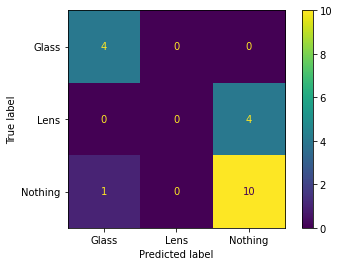

In [39]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [40]:
cross = pd.crosstab(d1['actual'],d1['predicted'],rownames=['Actual'],colnames=['Predicted'])
cross

Predicted,Glass,Nothing
Actual,,
Glass,4,0
Lens,0,4
Nothing,1,10


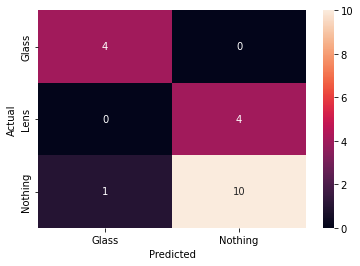

In [41]:
sns.heatmap(cross,annot = True)
plt.show()

In [42]:
from sklearn import tree

In [43]:
feature_name = ['Age','Sight','Astigmatic','Use']
feature_name

['Age', 'Sight', 'Astigmatic', 'Use']

In [44]:
class_name = ['Glass','Lens','Nothing']
class_name

['Glass', 'Lens', 'Nothing']

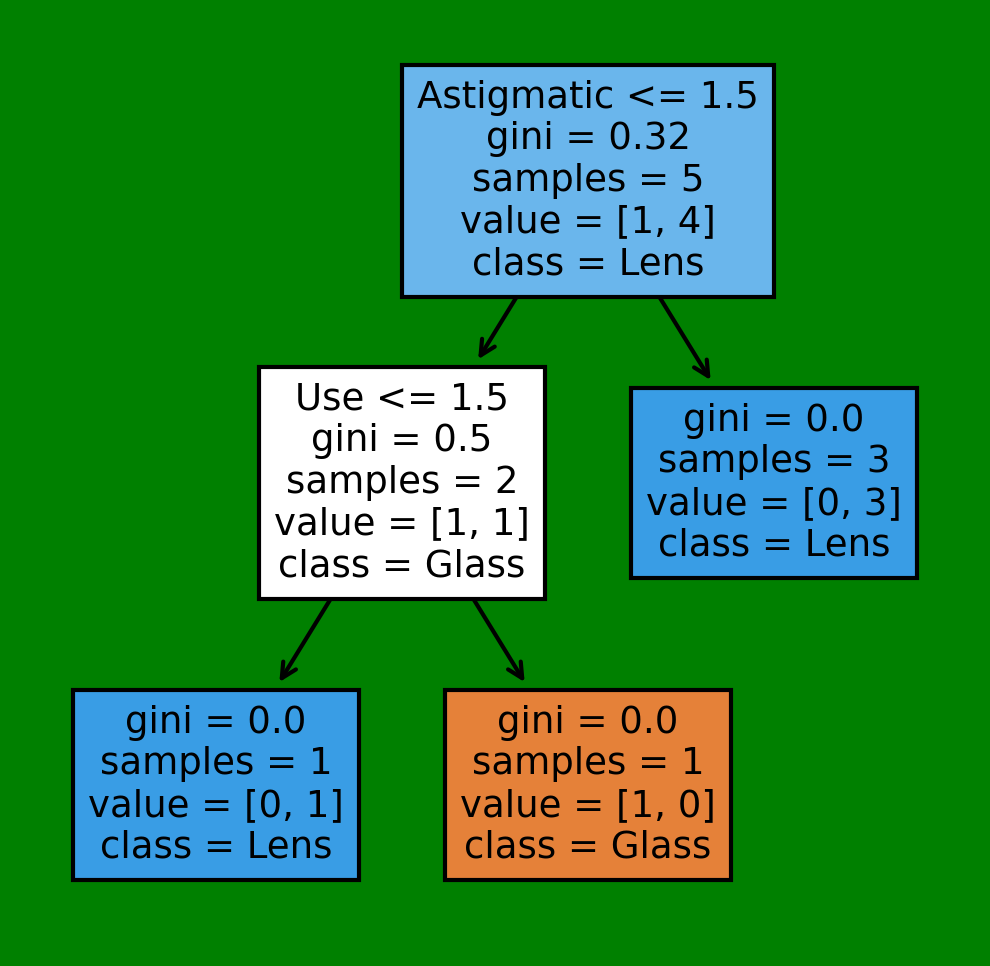

In [45]:
fig,ax= plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300, facecolor='g')
tree.plot_tree(model,feature_names=feature_name, class_names=class_name, filled=True)
plt.show()